Loaded combined cumulant tensor from /home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/single_cell_files/1Mb_combined_cumulant/chr1/sc11.ACTTGA_chr1_combined_cumulant.h5
Tensor dimensions: (249, 249, 249, 2)
Hi-C tensor: mean = -0.0000, std = 0.0003
Methylation tensor: mean = 0.0001, std = 0.0002


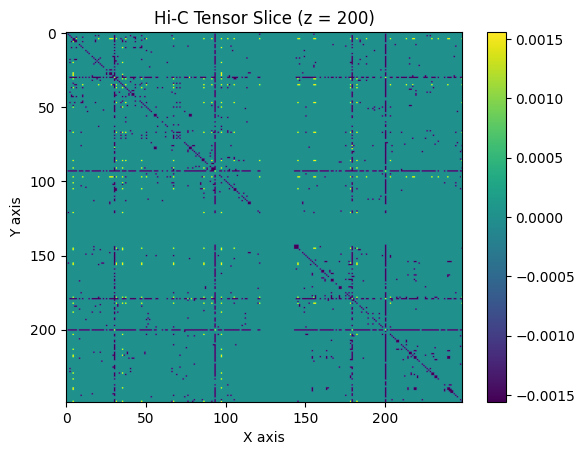

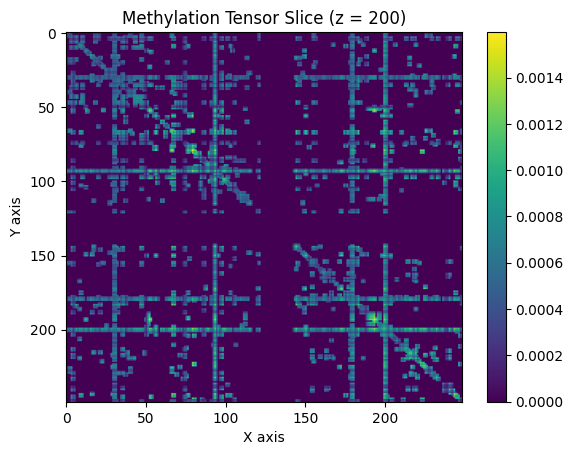

Correlation between Hi-C and Methylation tensors: -0.2246


In [4]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the path to the HDF5 file
chromosome = 'chr1'  # Specify the chromosome (e.g., 'chr1')
prefix = 'sc11.ACTTGA'  # Replace with your actual prefix
resolution_label = '1Mb'  # Replace with your actual resolution label
output_directory = '/home/dwk681/workspace/hypermatrix_test/hypermatrix/projects/single_cell_files'  # Replace with your output directory

# Construct the full file path
file_path = os.path.join(output_directory, f'{resolution_label}_combined_cumulant', chromosome, f'{prefix}_{chromosome}_combined_cumulant.h5')

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File does not exist: {file_path}")

# Load the combined cumulant tensor from the HDF5 file
with h5py.File(file_path, 'r') as h5file:
    combined_tensor = h5file['combined_cumulant_tensor'][:]

# Get the dimensions of the tensor
tensor_size = combined_tensor.shape

# Display basic information about the tensor
print(f"Loaded combined cumulant tensor from {file_path}")
print(f"Tensor dimensions: {tensor_size}")

# Separate the Hi-C and methylation tensors
hic_tensor = combined_tensor[..., 0]
methy_tensor = combined_tensor[..., 1]

# Basic analysis: Compute the mean and standard deviation for both tensors
hic_mean = np.mean(hic_tensor)
hic_std = np.std(hic_tensor)
methy_mean = np.mean(methy_tensor)
methy_std = np.std(methy_tensor)

print(f"Hi-C tensor: mean = {hic_mean:.4f}, std = {hic_std:.4f}")
print(f"Methylation tensor: mean = {methy_mean:.4f}, std = {methy_std:.4f}")

# Visualize the data (optional)

# Plot a slice of the Hi-C tensor
plt.figure()
slice_index = 200
plt.imshow(hic_tensor[:, :, slice_index], aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Hi-C Tensor Slice (z = {slice_index})')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# Plot a slice of the Methylation tensor
plt.figure()
plt.imshow(methy_tensor[:, :, slice_index], aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Methylation Tensor Slice (z = {slice_index})')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# Correlation analysis between Hi-C and Methylation tensors
correlation_matrix = np.corrcoef(hic_tensor.flatten(), methy_tensor.flatten())[0, 1]
print(f"Correlation between Hi-C and Methylation tensors: {correlation_matrix:.4f}")

# Additional analysis can be added as needed
